# IMPORT LIB

In [41]:
from keras.datasets import cifar10

from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import SGD,RMSprop,Adam

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DEFINE MODEL PARAMETERS

In [42]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 5
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# PREPROCESSING 

In [43]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Model

In [46]:
# network- CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# network - NN  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_21 (Activation)   (None, 512)               0         
__________

# COMPILE, FIT AND EVALUATE 

In [47]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
verbose=VERBOSE)
 
print('Testing...')
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 75s 2ms/step - loss: 1.7936 - acc: 0.3751 - val_loss: 1.5905 - val_acc: 0.4403
Epoch 2/5
40000/40000 [==============================] - 72s 2ms/step - loss: 1.3864 - acc: 0.5076 - val_loss: 1.3883 - val_acc: 0.5188
Epoch 3/5
40000/40000 [==============================] - 69s 2ms/step - loss: 1.2500 - acc: 0.5575 - val_loss: 1.2136 - val_acc: 0.5755
Epoch 4/5
40000/40000 [==============================] - 87s 2ms/step - loss: 1.1619 - acc: 0.5898 - val_loss: 1.1071 - val_acc: 0.6191
Epoch 5/5
40000/40000 [==============================] - 84s 2ms/step - loss: 1.0859 - acc: 0.6187 - val_loss: 1.1083 - val_acc: 0.6164
Testing...
10000/10000 [==============================] - 6s 590us/step

Test score: 1.1064779125213624
Test accuracy: 0.6137


# SAVE THE MODEL

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


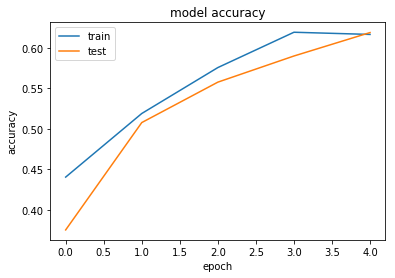

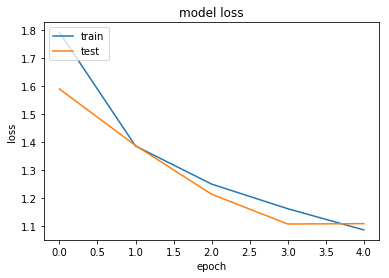

In [50]:
#server.launch(model)


#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PREDICT USING DOG AND CAT IMAGE

In [49]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

#load images
img_names = ['cat-standing.jpg', 'dog.jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32, 32)),
(1, 0, 2)).astype('float32')
for img_name in img_names]
imgs = np.array(imgs) / 255

# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
metrics=['accuracy'])

# predict
predictions = model.predict_classes(imgs)
print(predictions)

/Users/Mitul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/Users/Mitul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


[3 5]


In [ ]:
# improving with performance with a deeper network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))